## Regresion Logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
entrenamiento=pd.read_csv('https://raw.githubusercontent.com/eleonel78/Python_Projects/main/Titanic_train.csv')
entrenamiento.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
entrenamiento.shape

(891, 21)

In [4]:
#Revisamos si nuestro dataset contiene valores nulls
entrenamiento.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


<Axes: >

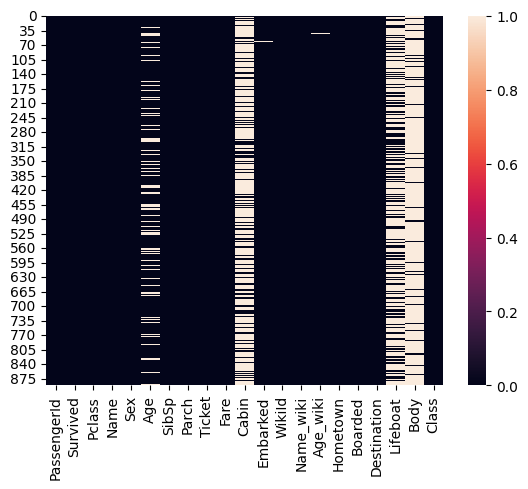

In [5]:
#Revisamos si hay muchos nulos en una columna de forma gráfica
sns.heatmap(entrenamiento.isnull())

<Axes: xlabel='Survived', ylabel='count'>

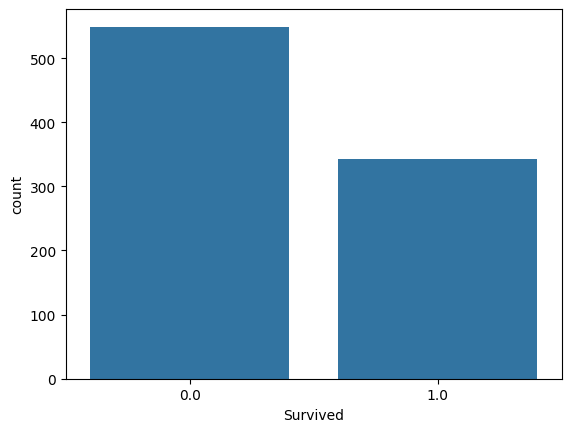

In [6]:
#Revisamos la proporción de sobrevivientes
sns.countplot(x='Survived',data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

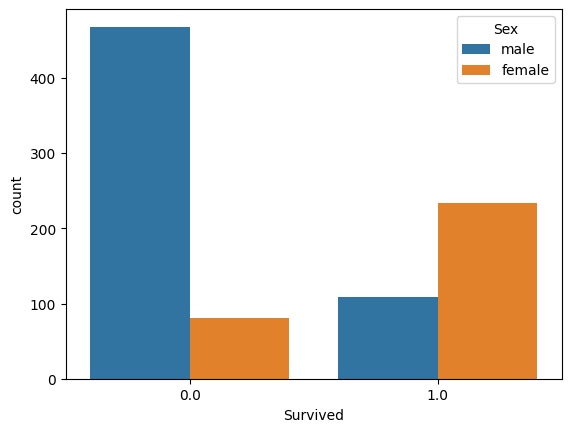

In [7]:
#Analizamos la supervivencia por el atributo de género
sns.countplot(x='Survived',data=entrenamiento, hue='Sex')

In [8]:
#obtenemos el vector de nombres de columna
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

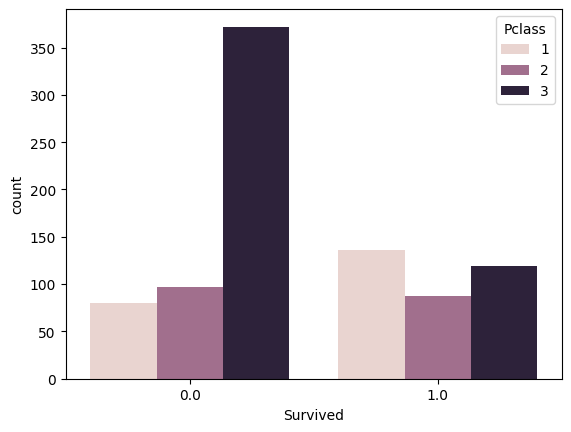

In [9]:
#Analizamos la supervivencia por clase del ticket
sns.countplot(x='Survived',data=entrenamiento, hue='Pclass')

<ipython-input-10-addca757417e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(entrenamiento['Age'].dropna(),kde=True, bins=30)


<Axes: xlabel='Age', ylabel='Density'>

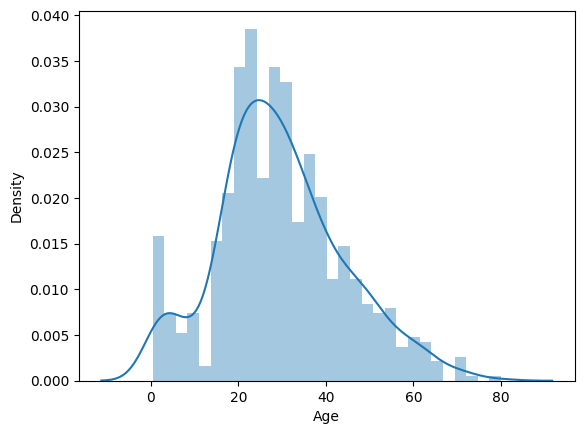

In [10]:
#Análisis de la Distribucion de Edades
sns.distplot(entrenamiento['Age'].dropna(),kde=True, bins=30)

<Axes: ylabel='Frequency'>

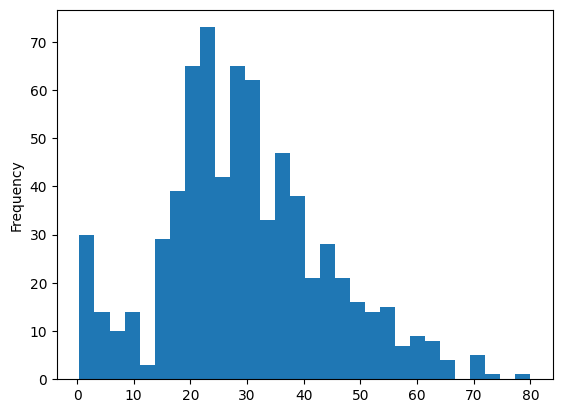

In [11]:
entrenamiento['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

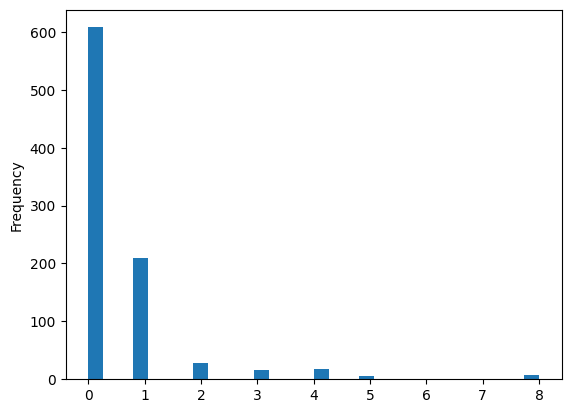

In [12]:
entrenamiento['SibSp'].plot.hist(bins=30)

In [13]:
#########################################################################
#Configuracion requerida para ejecturar gráficos interactivos (collab)
#########################################################################

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [14]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [15]:
init_notebook_mode(connected=True)
cf.go_offline()

In [16]:
configure_plotly_browser_state()
entrenamiento['Fare'].iplot(kind='hist',bins=40)

#########################################################################
#########################################################################
#########################################################################

In [17]:
configure_plotly_browser_state()
entrenamiento['Age'].iplot(kind='hist',bins=20)

#########################################################################
#########################################################################
#########################################################################

Imputacion

<Axes: xlabel='Pclass', ylabel='Age'>

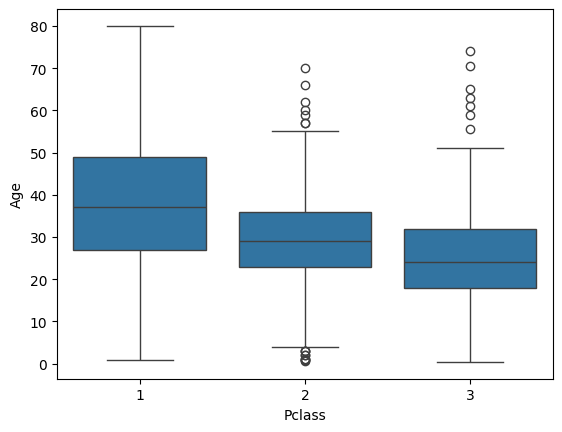

In [18]:
#Revisamos los niveles de Edades
sns.boxplot(x='Pclass',y='Age',data=entrenamiento)

In [19]:
#Definimos un valor para los valores nulos de la edad media por categoria de ticket
def edad_media(columnas):
  edad=columnas[0]
  clase=columnas[1]
  if pd.isnull(edad):
    if clase == 1:
      return 37
    elif clase == 2:
      return 30
    else:
      return 25
  else:
    return edad

In [20]:
#Aplicamos la formula a cada uno de los grupos de ticket
entrenamiento['Age']=entrenamiento[['Age','Pclass']].apply(edad_media, axis=1)

In [21]:
configure_plotly_browser_state()
entrenamiento['Age'].iplot(kind='hist',bins=20)

<Axes: >

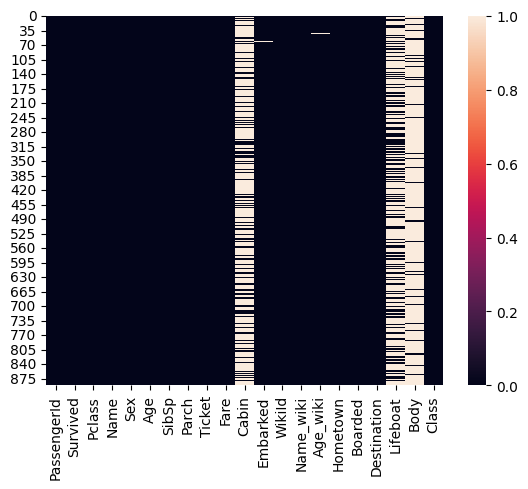

In [22]:
sns.heatmap(entrenamiento.isnull())

In [23]:
#Eliminamos columnas que no son utilies en el modelo
entrenamiento.drop('Cabin',axis=1,inplace=True)

<Axes: >

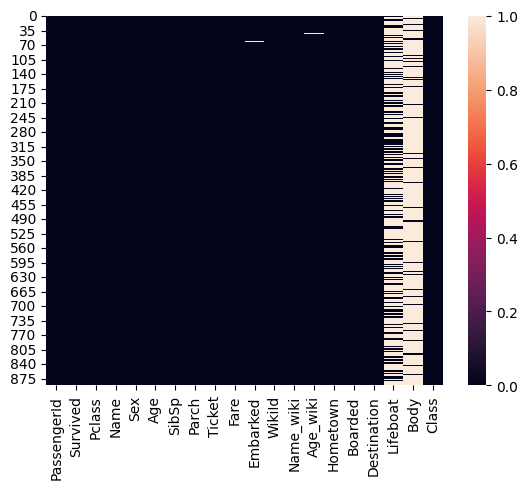

In [24]:
sns.heatmap(entrenamiento.isnull())

In [25]:
#Que columnas contiene nuestro nuevo dataset?
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [26]:
#Estas dos columnas no aportan mayor información al modelo
entrenamiento.drop(['Lifeboat','Body'],axis=1,inplace=True)

<Axes: >

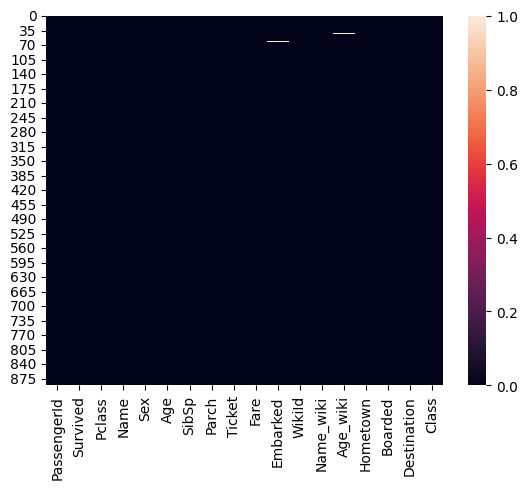

In [27]:
sns.heatmap(entrenamiento.isnull())

In [28]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0


In [29]:
#Tampoco estas columnas
entrenamiento.drop(['WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination'],axis=1,inplace=True)

<Axes: >

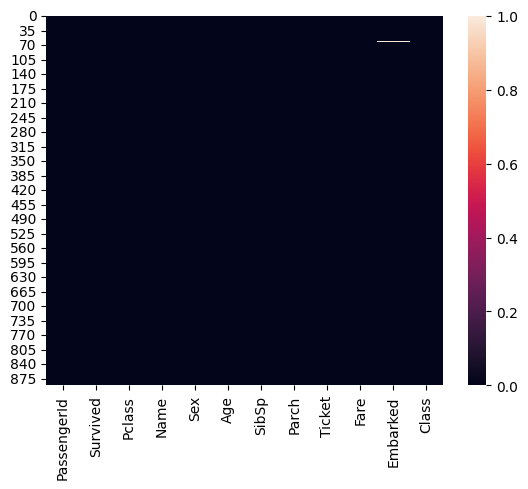

In [30]:
sns.heatmap(entrenamiento.isnull())

In [31]:
#Aunque la class nos sirvió para segmentar, la caracteristica no aporta mucha información
entrenamiento.drop(['Class'],axis=1,inplace=True)

<Axes: >

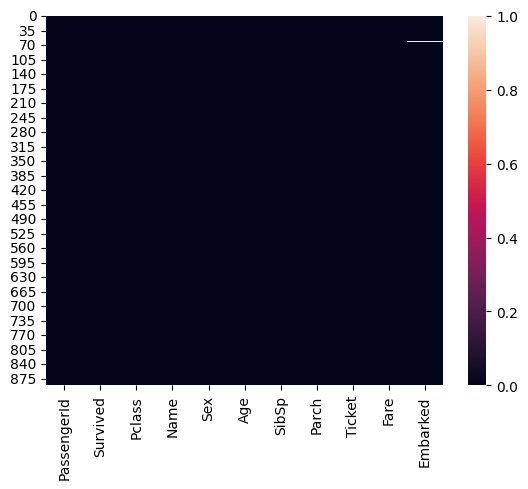

In [32]:
sns.heatmap(entrenamiento.isnull())

In [33]:
#Tenemos un dataset con columnas limpias
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
entrenamiento.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

<Axes: >

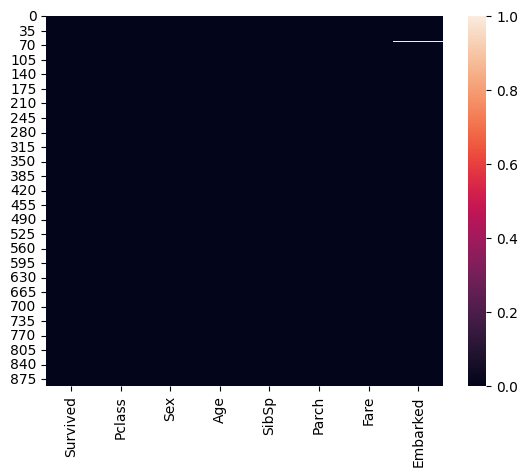

In [35]:
sns.heatmap(entrenamiento.isnull())

In [36]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [41]:
#Convertir categorica a numericas3 (recuerden que la regresión no acepta datos tipo caracter)
sexo=pd.get_dummies(entrenamiento['Sex'],drop_first=True)

In [42]:
sexo.head()

,male
0,True
1,False
2,False
3,False
4,True


In [38]:
#Anexamos la columna dummie generada del sexo

entrenamiento=pd.concat([entrenamiento,sexo],axis=1)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0.0,3,male,22.0,1,0,7.2500,S,True
1,1.0,1,female,38.0,1,0,71.2833,C,False
2,1.0,3,female,26.0,0,0,7.9250,S,False
3,1.0,1,female,35.0,1,0,53.1000,S,False
4,0.0,3,male,35.0,0,0,8.0500,S,True


In [39]:
#Eliminamos la variable cruda de sexo

#entrenamiento.drop(['Sex','PassengerId','Name','Ticket'],axis=1,inplace=True)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0.0,3,male,22.0,1,0,7.2500,S,True
1,1.0,1,female,38.0,1,0,71.2833,C,False
2,1.0,3,female,26.0,0,0,7.9250,S,False
3,1.0,1,female,35.0,1,0,53.1000,S,False
4,0.0,3,male,35.0,0,0,8.0500,S,True


In [45]:
#Hacemos lo mismo con el Puerto

puerto=pd.get_dummies(entrenamiento['Embarked'],drop_first=True)

In [46]:
puerto

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [47]:
entrenamiento.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
886,0.0,2,male,27.0,0,0,13.00,S,True
887,1.0,1,female,19.0,0,0,30.00,S,False
888,0.0,3,female,25.0,1,2,23.45,S,False
889,1.0,1,male,26.0,0,0,30.00,C,True
890,0.0,3,male,32.0,0,0,7.75,Q,True


In [48]:
#Juntamos los dos datesets

entrenamiento=pd.concat([entrenamiento,puerto],axis=1)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0.0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1.0,1,female,38.0,1,0,71.2833,C,False,False,False
2,1.0,3,female,26.0,0,0,7.9250,S,False,False,True
3,1.0,1,female,35.0,1,0,53.1000,S,False,False,True
4,0.0,3,male,35.0,0,0,8.0500,S,True,False,True


In [49]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   male      891 non-null    bool   
 9   Q         891 non-null    bool   
 10  S         891 non-null    bool   
dtypes: bool(3), float64(3), int64(3), object(2)
memory usage: 58.4+ KB


In [50]:
entrenamiento.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
886,0.0,2,male,27.0,0,0,13.00,S,True,False,True
887,1.0,1,female,19.0,0,0,30.00,S,False,False,True
888,0.0,3,female,25.0,1,2,23.45,S,False,False,True
889,1.0,1,male,26.0,0,0,30.00,C,True,False,False
890,0.0,3,male,32.0,0,0,7.75,Q,True,True,False


In [51]:
#Finalizando limpieza del dataset
entrenamiento.drop('Embarked',axis=1,inplace=True)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3,male,22.0,1,0,7.2500,True,False,True
1,1.0,1,female,38.0,1,0,71.2833,False,False,False
2,1.0,3,female,26.0,0,0,7.9250,False,False,True
3,1.0,1,female,35.0,1,0,53.1000,False,False,True
4,0.0,3,male,35.0,0,0,8.0500,True,False,True


In [ ]:
#entrenamiento.drop('Ticket', axis=1, inplace=True)
#entrenamiento.head()

In [ ]:
#entrenamiento.drop('PassengerId', axis=1, inplace=True)
#entrenamiento.head()

In [ ]:
#entrenamiento.drop('Name', axis=1, inplace=True)
#entrenamiento.head()

In [52]:
#Variable Target

Y=entrenamiento['Survived']

In [53]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [54]:
#Variables categóricas

X=entrenamiento.drop(['Survived','Sex'],axis=1)

In [55]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [56]:
#########################################################
### Importamos librerias de ML
#########################################################
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=45)

In [58]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
650,3,25.0,0,0,7.8958,True,False,True
784,3,25.0,0,0,7.0500,True,False,True
125,3,12.0,1,0,11.2417,True,False,False
54,1,65.0,0,1,61.9792,True,False,False
446,2,13.0,0,1,19.5000,False,False,True
...,...,...,...,...,...,...,...,...
725,3,20.0,0,0,8.6625,True,False,True
607,1,27.0,0,0,30.5000,True,False,True
544,1,50.0,1,0,106.4250,True,False,False
643,3,25.0,0,0,56.4958,True,False,True


In [59]:
X_train.shape

(623, 8)

In [60]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
248,1,37.0,1,1,52.5542,True,False,True
197,3,42.0,0,1,8.4042,True,False,True
133,2,29.0,1,0,26.0000,False,False,True
169,3,28.0,0,0,56.4958,True,False,True
736,3,48.0,1,3,34.3750,False,False,True
...,...,...,...,...,...,...,...,...
422,3,29.0,0,0,7.8750,True,False,True
815,1,37.0,0,0,0.0000,True,False,True
466,2,30.0,0,0,0.0000,True,False,True
559,3,36.0,1,0,17.4000,False,False,True


In [61]:
X_test.shape

(268, 8)

In [62]:
Y_test

248    1.0
197    0.0
133    1.0
169    0.0
736    0.0
      ... 
422    0.0
815    0.0
466    0.0
559    1.0
6      0.0
Name: Survived, Length: 268, dtype: float64

In [63]:
Y_train

650    0.0
784    0.0
125    1.0
54     0.0
446    1.0
      ... 
725    0.0
607    1.0
544    0.0
643    1.0
414    1.0
Name: Survived, Length: 623, dtype: float64

In [64]:
Y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Entrenamos el modelo

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [66]:
model = LogisticRegression()
#model.fit(X_train,Y_train)

In [67]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [68]:
predicciones = model.predict(X_test)
predicciones

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [69]:
predicciones.shape

(268,)

In [71]:
Y_test

248    1.0
197    0.0
133    1.0
169    0.0
736    0.0
      ... 
422    0.0
815    0.0
466    0.0
559    1.0
6      0.0
Name: Survived, Length: 268, dtype: float64

In [72]:
Y_test.shape

(268,)

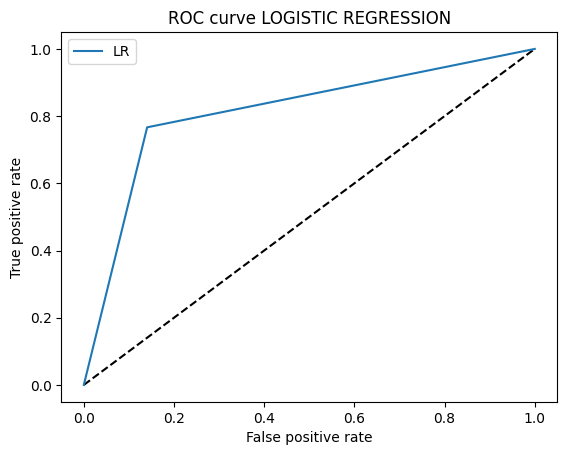

In [73]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, predicciones)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LOGISTIC REGRESSION')
plt.legend(loc='best')
plt.show()

In [74]:
fpr_lr

array([0.        , 0.14044944, 1.        ])

Metricas del modelo

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       178
         1.0       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



Matriz de confusion

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(Y_test,predicciones)

array([[153,  25],
       [ 21,  69]])

# Regresion Logistica con Statmodels

In [79]:
import statsmodels.api as sm
import pandas as pd

In [80]:
Y_test.head()

248    1.0
197    0.0
133    1.0
169    0.0
736    0.0
Name: Survived, dtype: float64

In [81]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
248,1,37.0,1,1,52.5542,True,False,True
197,3,42.0,0,1,8.4042,True,False,True
133,2,29.0,1,0,26.0000,False,False,True
169,3,28.0,0,0,56.4958,True,False,True
736,3,48.0,1,3,34.3750,False,False,True


In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 248 to 6
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  268 non-null    int64  
 1   Age     268 non-null    float64
 2   SibSp   268 non-null    int64  
 3   Parch   268 non-null    int64  
 4   Fare    268 non-null    float64
 5   male    268 non-null    bool   
 6   Q       268 non-null    bool   
 7   S       268 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 13.3 KB


In [84]:
X_test['male']=X_test['male'].astype(float)
X_test['Q']=X_test['Q'].astype(float)
X_test['S']=X_test['S'].astype(float)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 248 to 6
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  268 non-null    int64  
 1   Age     268 non-null    float64
 2   SibSp   268 non-null    int64  
 3   Parch   268 non-null    int64  
 4   Fare    268 non-null    float64
 5   male    268 non-null    float64
 6   Q       268 non-null    float64
 7   S       268 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 18.8 KB


In [86]:
X_train['male']=X_train['male'].astype(float)
X_train['Q']=X_train['Q'].astype(float)
X_train['S']=X_train['S'].astype(float)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 650 to 414
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  623 non-null    int64  
 1   Age     623 non-null    float64
 2   SibSp   623 non-null    int64  
 3   Parch   623 non-null    int64  
 4   Fare    623 non-null    float64
 5   male    623 non-null    float64
 6   Q       623 non-null    float64
 7   S       623 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 43.8 KB


In [87]:
log_reg = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.509023
         Iterations 7


In [88]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.2457
Time:                        03:31:43   Log-Likelihood:                -317.12
converged:                       True   LL-Null:                       -420.40
Covariance Type:            nonrobust   LLR p-value:                 4.705e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0023      0.100     -0.023      0.982      -0.199       0.194
Age           -0.0028      0.007     -0.413      0.679      -0.016       0.011
SibSp         -0.3137      0.114     -2.755      0.0

In [89]:
Y_hat = log_reg.predict(X_test)

In [90]:
prediction = list(map(round, Y_hat))

In [91]:
print('Acutal values', list(Y_test.values))

Acutal values [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 

In [92]:
print('Predictions :', prediction)

Predictions : [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [93]:
print(Y_test.shape)
print(Y_hat.shape)

(268,)
(268,)


In [94]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

In [95]:
# confusion matrix
cm = confusion_matrix(Y_test, prediction)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[156  22]
 [ 27  63]]


In [96]:
confusion_matrix(Y_test,predicciones)

array([[153,  25],
       [ 21,  69]])

<Axes: >

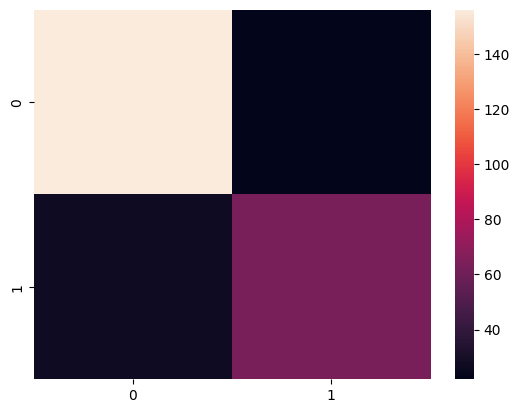

In [97]:
sns.heatmap(cm)

In [98]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, prediction))

Test accuracy =  0.8171641791044776


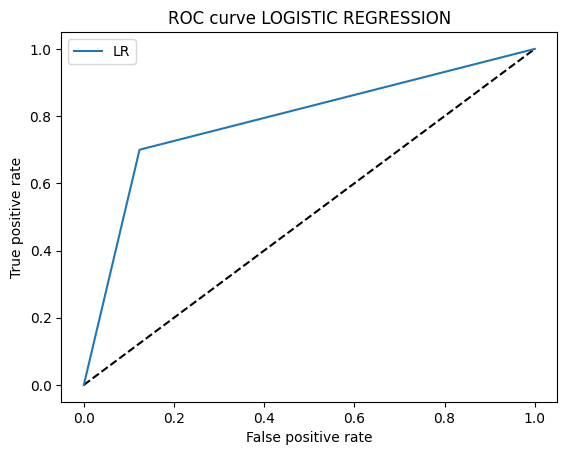

In [99]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve LOGISTIC REGRESSION')
plt.legend(loc='best')
plt.show()

In [ ]:
fpr_lr

array([0.        , 0.12359551, 1.        ])